## importing necessary libraries

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



## Load Data Set

In [5]:
churn_df = pd.read_csv("churn_Modelling.csv")

churn_df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_df.shape

(10000, 14)

## Train Data

In [7]:
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
churn_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
churn_df.shape

(10000, 14)

In [5]:
churn_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
churn_df.shape

(10000, 14)

In [ ]:
## dropping the columns [customerId, rowNumber, surname] as they don't contribute to the prediction
churn_df.drop(columns = ['CustomerId', 'RowNumber', 'Surname'], inplace=True)

## Encode categorical columns (Geography, Gender)

In [ ]:
label_encoder = LabelEncoder()

# applying label encoding to the geography column
churn_df['Geography_encoded'] = label_encoder.fit_transform(churn_df['Geography'])

# applying label encoding to the Gender column
churn_df['Gender_encoded'] = label_encoder.fit_transform(churn_df['Gender'])

churn_df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,1


## Normalize Numerical Columns

In [ ]:
# initialize the min max scaler
scaler = MinMaxScaler()

numerical_columns = ['Age', 'Balance', 'EstimatedSalary']

churn_df_normalized = churn_df.copy() # make a copy to preserver original data

# applying normalization to numerical columns
churn_df_normalized[numerical_columns] = scaler.fit_transform(churn_df[numerical_columns])

# display the normaized output
print('Normalized Dataset')
churn_df_normalized

Normalized Dataset


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
0,619,France,Female,0.324324,2,0.000000,1,1,1,0.506735,1,0,0
1,608,Spain,Female,0.310811,1,0.334031,1,0,1,0.562709,0,2,0
2,502,France,Female,0.324324,8,0.636357,3,1,0,0.569654,1,0,0
3,699,France,Female,0.283784,1,0.000000,2,0,0,0.469120,0,0,0
4,850,Spain,Female,0.337838,2,0.500246,1,1,1,0.395400,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,0.283784,5,0.000000,2,1,0,0.481341,0,0,1
9996,516,France,Male,0.229730,10,0.228657,1,1,1,0.508490,0,0,1
9997,709,France,Female,0.243243,7,0.000000,1,0,1,0.210390,1,0,0
9998,772,Germany,Male,0.324324,3,0.299226,2,1,0,0.464429,1,1,1


In [ ]:
from sklearn.model_selection import train_test_split

# churn_df_normalized is preprocessed dataset
# separate the feature (X) and the target variable (y)

X = churn_df_normalized.drop(columns=['Exited'])
y = churn_df_normalized['Exited']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the datasets
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Training set size: 8000 rows
Testing set size: 2000 rows


## DATA VISUALIZATION

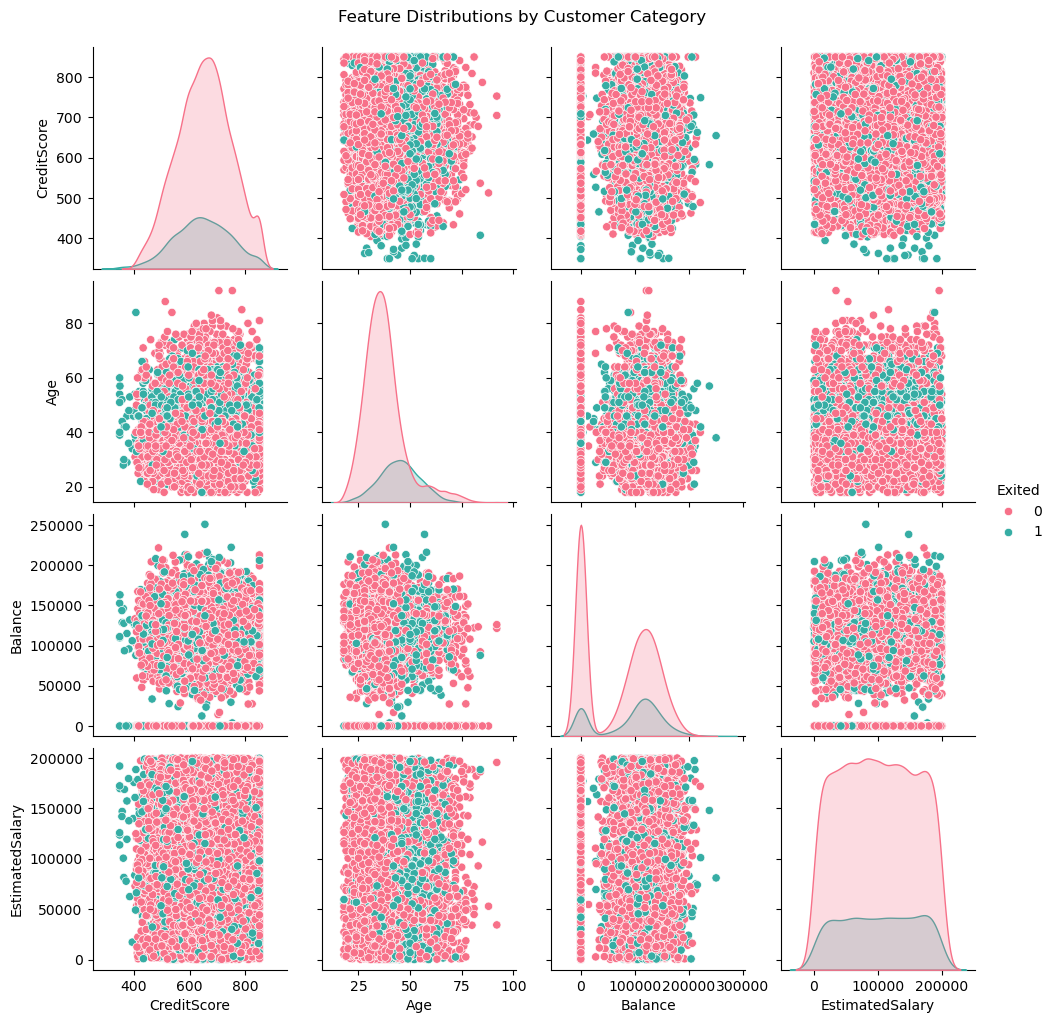

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
churn_df_normalized = pd.read_csv('Churn_Modelling.csv')  # Replace with the correct file path in case you are trying to run on other device and your are not collaborated with me in git hub

# Ensure the columns exist in the dataset
selected_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']
if all(col in churn_df_normalized.columns for col in selected_columns):
    # Pairplot for selected features
    pairplot_fig = sns.pairplot(
        churn_df_normalized[selected_columns],
        hue='Exited',
        palette='husl'
    )
    # Add a title to the figure
    pairplot_fig.fig.suptitle("Feature Distributions by Customer Category", y=1.02)
    plt.show()
else:
    print("Some selected columns are missing from the DataFrame.")


# Train the model

In [ ]:
# Drop the original non-numeric columns
X_train = X_train.drop(['Geography', 'Gender'], axis=1, errors='ignore')
X_test = X_test.drop(['Geography', 'Gender'], axis=1, errors='ignore')

# Initialize the KNN classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Evaluate and debug
print("Model Accuracy on Test Data:", knn.score(X_test, y_test))
print("Data Types in X_train:", X_train.dtypes)


Model Accuracy on Test Data: 0.782
Data Types in X_train: CreditScore            int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_encoded      int32
Gender_encoded         int32
dtype: object


# make predictions

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Check the predictions
print("Predictions on Test Data:", y_pred)

print(X_train.columns)
print(X_test.columns)

Predictions on Test Data: [0 0 0 ... 0 0 1]
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_encoded',
       'Gender_encoded'],
      dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_encoded',
       'Gender_encoded'],
      dtype='object')


# Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.78
Confusion Matrix:
[[1533   74]
 [ 362   31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1607
           1       0.30      0.08      0.12       393

    accuracy                           0.78      2000
   macro avg       0.55      0.52      0.50      2000
weighted avg       0.71      0.78      0.73      2000



## optimized the value of k

Optimal K: 20


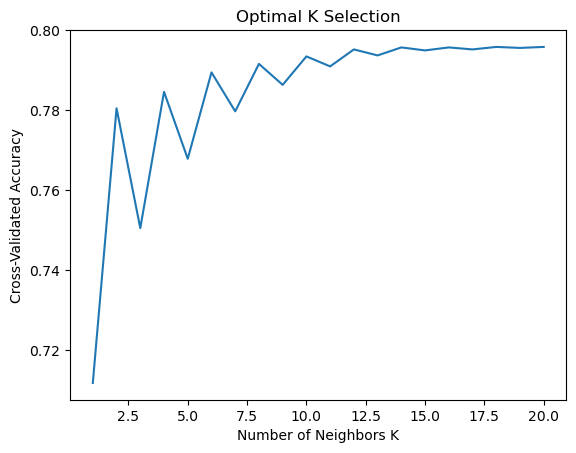

In [ ]:
from sklearn.model_selection import cross_val_score

# Test different values of K
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal K
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Optimal K: {optimal_k}")

# Plot the cross-validation results
import matplotlib.pyplot as plt

plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal K Selection')
plt.show()
